In [1]:
# cdy
import numpy as np
from scipy import fftpack

# do 
# generate an array from -9 to 9 of length 201 
N = 201 
dx = (9 - (-9)) / (N - 1)
x = np.arange(-9, 9+dx, dx)

# calculate an example psi array
psi = np.exp(-(x**2)/3)*np.cos(2*x)
# find derivative of this psi array
dpsi = fftpack.diff(psi, period=N*dx)

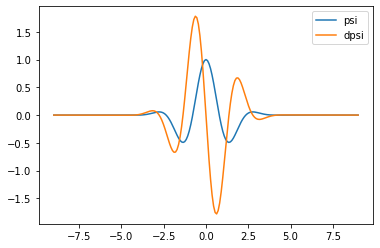

In [2]:
import matplotlib.pyplot as plt 
plt.figure() 
plt.plot(x, psi, label='psi')
plt.plot(x, dpsi, label='dpsi')
plt.legend()
plt.show()

2. The Hamiltonian for the quantum harmonic oscillator is given by 
$$
H =\frac{p^2}{2m}+\frac{1}{2}m\omega^2x^2
$$
Substituting this into the time-independent Schrödinger equation $H\psi(x) = E\psi(x)$ and solving for the first excited state, we find that this corresponds to the wavefunction
$$
\psi_1(x) =\left(\frac{4\alpha^3}{\pi}\right)^{1/4}e^{-\alpha x^2/2}
$$
where $\alpha = m\omega/\hbar$.  
(1) Using the Riemann sum technique to approximate the Fourier transform, let $\alpha = 1$ and discretise $\psi(x)$ over a reasonable grid size and modify the sample script to numerically calculate the momentum-space wavefunction $\phi(k)$. Remember to choose your domain $−x_\text{max} < x < x_\text{max}$ such that $\psi(\pm x_\text{max}) \approx 0$.  
(2) How does your result compare against the exact result? Produce an error plot comparing the exact and numerical results over the domain.  
(3) Repeat part (1) for varying grid discretisations $\Delta x$, and plot the resulting maximum absolute error vs $\Delta x$. What do you find? How does the error in this approximation scale with $\Delta x$?

The minimum of x satisfies phi(x) ~ 0 is 16.

The max error is 0.2210792341385044.

Absolute error is almost the same (difference exists after 12 decimal place).
Which shows the predict value equals the exact times a constant.


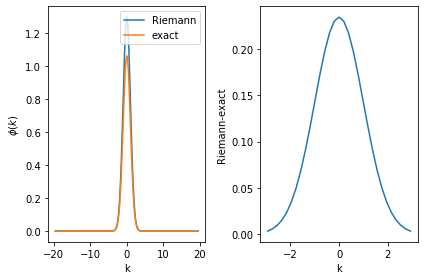

In [1]:
# HJH
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def psi(x):
    return pow(4/np.pi,1/4)*np.exp(-x**2/2)

# x = np.arange(-10, 11, 1)
# plt.plot(x,psi(x))

# define phi(x) < 1e-15 as small enough.
xmin = 2
while psi(xmin) > 1e-15:
    xmin *= 2

print('The minimum of x satisfies phi(x) ~ 0 is {}.\n'.format(xmin))

# carry out fourier transform
def Riemann_fourier(xmax,func):
    # define the properties
    N = 201
    a = (N - 1) / 2
    halfL = xmax
    dx = (halfL - (-halfL)) / (N - 1)

    # define the x-grid and discretised wavefunction
    x = np.arange(-halfL, halfL+dx, dx)
    psi = func(x)

    # define the k-grid
    dk = 2*np.pi / (N*dx)
    kmax = np.pi / dx
    k = np.arange(-kmax, kmax, dk)  # 1D array, k.shape: (202,)
    k_mid = np.arange(-kmax+dk/2,kmax-dk/2,dk)

    # the 2-dimensional Fourier matrix using broadcasting
    n = np.arange(N).reshape((-1, 1))   # 2D array, change with rows, n.shape(201,1)
    m = np.arange(N).reshape((1, -1))   # 2D array, change with columns, m.shape(1,201)
    W = np.exp(-2j*np.pi*(m-a)*(n-a)/N)  # numpy array broarcasting, W is a 2D array, W.shape(201,201)

    # perform the discretised Fourier algorithm
    # psi is indexed by n
    psi_dft = psi.reshape(-1, 1)      # 2D array, psi_dft.shape(201,1)
    # sum over n axis
    phi = np.sum(psi_dft * W, axis=0)*dk/np.sqrt(2*np.pi) # 1D array, phi.shape(201,)
    return k_mid,phi

k,phi = Riemann_fourier(xmin,psi)

# (2) The analytical result of fourier transform is the same as the raw function.
# first plot the result
plt.subplot(1,2,1)
plt.plot(k,phi)
plt.plot(k,psi(k))
plt.legend(["Riemann","exact"])
plt.xlabel('k')
plt.ylabel('$\phi(k)$')

# then the error
plt.subplot(1,2,2)
idx = (k > -3) * (k < 3)
error = (abs(phi[idx]) - psi(k[idx]))
abserror = np.max((abs(phi[idx]) - psi(k[idx]))/psi(k[idx]))
print('The max error is {}.\n'.format(abserror))
plt.plot(k[idx],error)
plt.xlabel('k')
plt.ylabel('Riemann-exact')
plt.tight_layout()
print('Absolute error is almost the same (difference exists after 12 decimal place).\n\
Which shows the predict value equals the exact times a constant.')

Obviously, the absolute error explode at small delta x. This also agree with theory.
Too small delta x will contributes to the problem of resulting discretize.


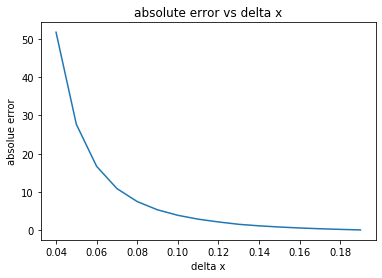

In [2]:
# (3) compare with various delta x
def test_deltaX(xmax,func):
    # define the properties
    N = 201
    a = (N - 1) / 2
    halfL = xmax
    dx = (halfL - (-halfL)) / (N - 1)

    # define the x-grid and discretised wavefunction
    x = np.arange(-halfL, halfL+dx, dx)
    psi = func(x)

    # define the k-grid
    dk = 2*np.pi / (N*dx)
    kmax = np.pi / dx
    k = np.arange(-dk*a-dk, dk*a+dk, dk)  # 1D array, k.shape: (202,)
    # print(k.shape)
    k_mid = np.arange(-dk*a-dk/2,dk*a+dk/2,dk)

    # the 2-dimensional Fourier matrix using broadcasting
    n = np.arange(N).reshape((-1, 1))   # 2D array, change with rows, n.shape(201,1)
    m = np.arange(N).reshape((1, -1))   # 2D array, change with columns, m.shape(1,201)
    W = np.exp(-2j*np.pi*(m-a)*(n-a)/N)  # numpy array broarcasting, W is a 2D array, W.shape(201,201)

    # perform the discretised Fourier algorithm
    # psi is indexed by n
    psi_dft = psi.reshape(-1, 1)      # 2D array, psi_dft.shape(201,1)
    # sum over n axis
    phi = np.sum(psi_dft * W, axis=0)*dk/np.sqrt(2*np.pi) # 1D array, phi.shape(201,)
    exact_phi = func(k_mid)
    # return the maximal error
    idx = (k_mid > -3) * (k_mid < 3)
    error = (abs(phi[idx]) - func(k_mid[idx]))
    max_error = np.max((abs(phi[idx]) - func(k_mid[idx]))/func(k_mid[idx]))
    return dx,max_error

Delta,Err = [],[]
for xmax in range(4,20,1):
    delta,err = test_deltaX(xmax,psi)
    Delta.append(delta)
    Err.append(err)

plt.plot(Delta,Err)
plt.xlabel('delta x')
plt.ylabel('absolue error')
plt.title('absolute error vs delta x')
print('Obviously, the absolute error explode at small delta x. This also agree with theory.\n\
Too small delta x will contributes to the problem of resulting discretize.')

### 3.求导

(1) Use Fourier differentiation and FFT implementation to calculate the first derivative of $\psi_1(x)$ from problem 1, letting $\alpha = 1$ and using $N = 256$ discretised grid points.   
由1题知：    
$$\psi^\prime_l = \frac{2\pi i}{N^2\Delta x} \sum_{n=0}^{N-1}\sum_{m=0}^{N-1}(m-a) \psi_n e^{2\pi i(m-a)(l-n)/N}$$
Fourier differentiation方法详细过程为：   
$$\psi^\prime_l = \frac{2\pi i}{N^2\Delta x} e^{-2\pi ial/N} \sum_{m=0}^{N-1} \left[ (m-a)e^{-2\pi iml/N} \sum_{n=0}^{N-1} \psi_n e^{-2\pi ian/N} e^{-2\pi imn/N} \right]$$
令 $$f_n = \psi_n e^{2\pi i an/N}$$
应用快速傅里叶变化FFT可以得：$$F_m = \sum_{n=0}^{N-1} f_n e^{2\pi i mn/N}$$
令$$\varphi_m = (m-a)F_m$$
则由FFT逆变换可得： $$\phi_l = \sum_{m=0}^{N-1} \varphi_m e^{2\pi i ml/N} $$
最终， $$\psi_l^\prime(x)= \frac{2\pi i}{N^2\Delta x} e^{2\pi i al/N} \phi_l$$

注：快速傅里叶变化的思想：
$$\begin{aligned}
  &\begin{cases}F_{m\pm N}=F_m\\
    A_{m\pm N/2}=A_m,\; B_{m\pm N/2}=B_m
    \end{cases}\Rightarrow\\
    & F_m=\begin{cases}
    A_m+e^{-2\pi im/N}B_m, & 0\leq m<N/2\\
    A_{m-N/2}+e^{-2\pi im/N}B_{m-N/2}, & N/2\leq m\leq N-1
    \end{cases}\\\\
    &\begin{cases}
    F_m&= A_m+e^{-2\pi im/N}B_m\\
    F_{m+N/2}&= A_m-e^{-2\pi im/N}B_m\end{cases},  \; 0\leq m\leq N/2-1
    \end{aligned}$$ 

In [1]:
import numpy as np

def FFT2_numpy(f):      #定义快速傅里叶变换FFT，得到 x空间->k空间的变化后函数值
    # Compute all 2-point DFTs     
    N = f.shape[0]     
    W = np.array([[1, 1], [1, -1]])     
    F = np.dot(W, f.reshape([2, -1]))          
    # number of remaining Cooley-Tukey stages     
    stages = int(np.log2(N))-1     
    for i in range(stages):         
        k = F.shape[0] # size of the DFTs to combine         
        n = F.shape[1] # number of DFTs to combine         
        Am = F[:, :n//2] # 'even' terms         
        Bm = F[:, n//2:] # 'odd' terms         
        twiddle = np.exp(-1.j*np.pi*np.arange(k)/k)[:, None]         
        F = np.vstack([Am + twiddle*Bm, Am - twiddle*Bm])     
    return F.flatten()

def FFT2_inv(f):       #定义逆快速傅里叶变换 逆FFT，得到 k空间->x空间的变化后函数值
    # Compute all 2-point DFTs     
    N = f.shape[0]     
    W = np.array([[1, 1], [1, -1]])     
    F = np.dot(W, f.reshape([2, -1]))          
    # number of remaining Cooley-Tukey stages     
    stages = int(np.log2(N))-1     
    for i in range(stages):         
        k = F.shape[0] # size of the DFTs to combine         
        n = F.shape[1] # number of DFTs to combine         
        Am = F[:, :n//2] # 'even' terms         
        Bm = F[:, n//2:] # 'odd' terms         
        twiddle = np.exp(1.j*np.pi*np.arange(k)/k)[:, None]         
        F = np.vstack([Am + twiddle*Bm, Am - twiddle*Bm])     
    return F.flatten()

In [2]:
def first_derivative_FFT(psi,halfL,N):
    a = (N - 1)/2
    dx = (halfL - (-halfL))/(N - 1)
    x = np.arange(-halfL, halfL+dx, dx) #定义求导区间范围
    
    n = np.arange(N)
    l = np.arange(N)
    m = np.arange(N)
    
    #以下步骤按照上述思路编写
    Fm = FFT2_numpy(np.exp(2j*np.pi*a*n/N) * psi)
    psi_prime = FFT2_inv(Fm*(m-a))
    psi_prime *= np.exp(-2j*np.pi*a*l/N) * 2j*np.pi / (N**2 * dx)
    
    return psi_prime

Text(0, 0.5, 'd f(x) / dx')

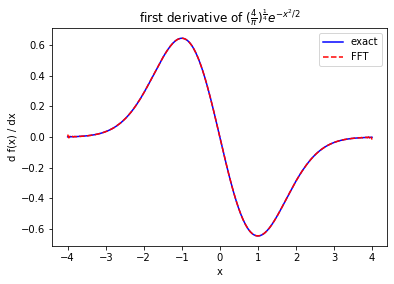

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

halfL = 4.; N = 256#区间中取点数 
dx = (halfL - (-halfL))/(N - 1)
x = np.arange(-halfL, halfL+dx, dx)
func = np.exp(-(x**2)/2)*(4/np.pi)**0.25
psi_prime = first_derivative_FFT(psi=func,halfL=4,N=256) #FFT方法求得一阶导数值

dpsi_exact = -x * np.exp(-(x**2)/2) * (4/np.pi)**0.25  #精确一阶导数值

plt.plot(x,dpsi_exact,'b',x,np.real(psi_prime),'r--')
plt.legend(['exact','FFT'])
plt.title(r'first derivative of $(\frac{4}{\pi})^{\frac{1}{4}}e^{-x^2/2}$')
plt.xlabel('x')
plt.ylabel('d f(x) / dx')

 (2) Modify the formula to instead calculate the second derivative. Use this expression to calculate the second derivative of $\psi_1(x)$.    
已知，二阶导数的求和形式为：
$$\begin{aligned}
\psi_l^{\prime\prime} &=\frac{1}{2\pi}\Delta x\Delta k \sum_{n=0}^{N-1}\sum_{m=0}^{N-1}\psi_n(ik_m)^2 e^{ik_m(x_l-x_n)}\\
& = \frac{-(2\pi)^2}{N^3(\Delta x)^2} \sum_{n=0}^{N-1}\sum_{m=0}^{N-1}(m-a)^2 \psi_n e^{2\pi i(m-a)(l-n)/N}
\end{aligned}  $$
因此，具体编程思路与（1）小问相似，只需要将$\varphi_m$和$\psi_l^\prime$的系数稍加需改即可，其他不变
$$\varphi_m = (m-a)^2F_m$$
$$\psi_l^\prime(x)= \frac{-(2\pi)^2}{N^3(\Delta x)^2} e^{2\pi i al/N} \phi_l$$

In [4]:
def second_derivative_FFT(psi,halfL,N):
    a = (N - 1)/2 
    dx = (halfL - (-halfL))/(N - 1) #小区间长度
    x = np.arange(-halfL, halfL+dx, dx)  #求导范围
    
    n = np.arange(N)
    l = np.arange(N)
    m = np.arange(N)
    #以下按照上述思路求二阶导数值
    Fm = FFT2_numpy(np.exp(2j*np.pi*a*n/N) * psi)
    psi_priprime = FFT2_inv(Fm*(m-a)**2)
    psi_priprime *= np.exp(-2j*np.pi*a*l/N) * (-4)*np.pi**2 / (N**3 * dx**2)
    
    return psi_priprime

Text(0, 0.5, '$d^2f(x) / dx^2$')

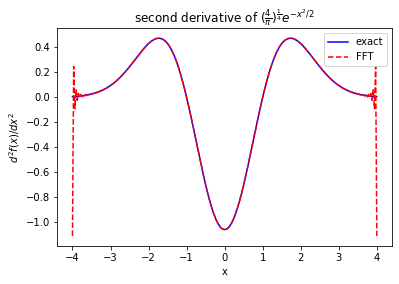

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

halfL = 4.; N = 256
dx = (halfL - (-halfL))/(N - 1)
x = np.arange(-halfL, halfL+dx, dx)
func = np.exp(-(x**2)/2)*(4/np.pi)**0.25
psi_priprime = second_derivative_FFT(psi=func,halfL=4,N=256)  #FFT方法求得二阶导数值

ddpsi_exact = (x**2-1) * np.exp(-(x**2)/2) * (4/np.pi)**0.25  #精确二阶导数值

plt.plot(x,ddpsi_exact,'b',x,np.real(psi_priprime),'r--')
plt.legend(['exact','FFT'])
plt.title(r'second derivative of $(\frac{4}{\pi})^{\frac{1}{4}}e^{-x^2/2}$')
plt.xlabel('x')
plt.ylabel(r'$d^2f(x) / dx^2$')

(3) Compare your results to the exact solution to the first derivative $\psi_1(x)$ and the second derivative $\psi_1(x)$. What do you find? Repeat your results for various values of $N$, and plot the maximum error vs $N$.

Text(0, 0.5, 'max error')

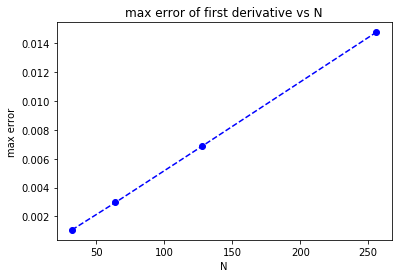

In [6]:
n = np.array([32,64,128,256])  #不同的取点数
max_error_1 = np.zeros(len(n))
for i in range(len(n)) :
    halfL = 4.
    dx = (halfL - (-halfL))/(n[i] - 1)
    x = np.arange(-halfL, halfL+dx, dx)
    func = np.exp(-(x**2)/2)*(4/np.pi)**0.25
    psi_prime = first_derivative_FFT(psi=func,halfL=4,N=n[i]) #FFT方法一阶导数
    dpsi_exact = -x * np.exp(-(x**2)/2) * (4/np.pi)**0.25  #精确一阶导数值

    err = np.real(abs(psi_prime-dpsi_exact))
    max_error_1[i] = max(err)  #求导范围中误差的最大值
    
plt.plot(n,max_error_1,'bo--') #最大误差随取点数N的变化
plt.title('max error of first derivative vs N')
plt.xlabel('N')
plt.ylabel('max error')

FFT方法求得的一阶导数与精确值的最大误差与取点数n近似呈线性关系。

Text(0, 0.5, 'max error')

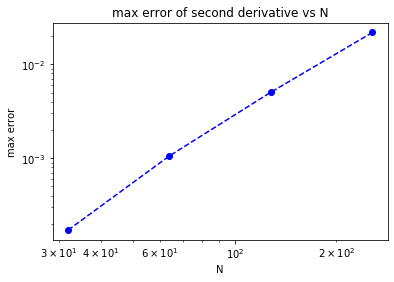

In [11]:
n = np.array([32,64,128,256])
max_error_2 = np.zeros(len(n))
for i in range(len(n)) :
    halfL = 4.
    dx = (halfL - (-halfL))/(n[i] - 1)
    x = np.arange(-halfL, halfL+dx, dx)
    func = np.exp(-(x**2)/2)*(4/np.pi)**0.25
    psi_priprime = second_derivative_FFT(psi=func,halfL=4,N=n[i]) #FFT二阶导
    ddpsi_exact = (x**2-1) * np.exp(-(x**2)/2) * (4/np.pi)**0.25 #精确二阶导

    err = np.real(abs(psi_priprime-ddpsi_exact))

    max_error_2[i] = max(err[5:len(err)-5:1]) #去掉前后边界5个点的求导范围内的误差最大值
plt.loglog(n,max_error_2,'bo--')   
#plt.plot(n,max_error_2,'bo--')  #最大误差随取点数N的变化
plt.title('max error of second derivative vs N')
plt.xlabel('N')
plt.ylabel('max error')

FFT方法求得的二阶导数与精确值的最大误差与取点数n呈递增关系，但非线性。

(4) Extend your analysis to include the method of finite differences. What can you say about the accuracy of Fourier differentiation vs the finite-difference method?    
对于有限差分法，我们将求导区间划分成长为h的N-1段，因此一阶导数可以近似为：
$$f'(i)= \frac{f(i+1)-f(i-1)}{2h}$$
二阶导数可以近似为：
$$f''(i)=\frac{f(i+1)-2f(i)+f(i-1)}{h^2}$$

Text(0, 0.5, 'max error')

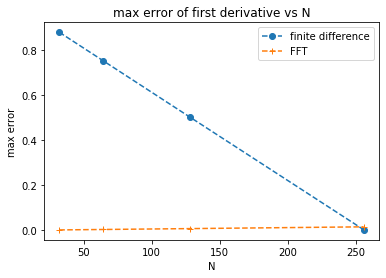

In [10]:
n = np.array([32,64,128,256])
max_error_3 = np.zeros(len(n))
halfL = 4.
for i in range(len(n)):
    dx = (halfL - (-halfL))/(n[i] - 1)
    x_finite = np.arange(-halfL,halfL+dx,dx)
    func = np.exp(-(x**2)/2)*(4/np.pi)**0.25
    dpsi_exact = -x * np.exp(-(x**2)/2) * (4/np.pi)**0.25
    difference = np.zeros(n[i]-2)
    for j in range(0,n[i]-2):
        difference[j] = (func[j+2]-func[j])/(2*dx)
        
    max_error_3[i] = max(abs((difference-dpsi_exact[1:n[i]-1:1])/dpsi_exact[1:n[i]-1:1]) )   
    #max_error_3[i] = max(abs(difference-dpsi_exact[1:n[i]-1:1])
plt.plot(n,max_error_3,'o--',n,max_error_1,'+--')
plt.legend(['finite difference','FFT'])
plt.title('max error of first derivative vs N')
plt.xlabel('N')
plt.ylabel('max error')


Text(0,0.5,'max error')

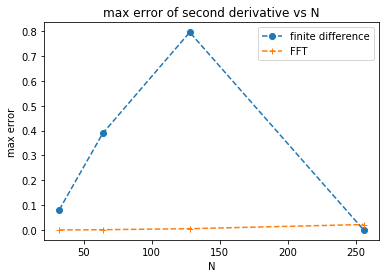

In [9]:
n = np.array([32,64,128,256])
max_error_4 = np.zeros(len(n))
halfL = 4.
for i in range(len(n)):
    dx = (halfL - (-halfL))/(n[i] - 1)
    x_finite = np.arange(-halfL,halfL+dx,dx)
    func = np.exp(-(x**2)/2)*(4/np.pi)**0.25
    ddpsi_exact = (x**2-1) * np.exp(-(x**2)/2) * (4/np.pi)**0.25  #精确一阶导数值
    difference = np.zeros(n[i]-2)
    for j in range(0,n[i]-2):
        difference[j] = (func[j+2]-2*func[j+1]+func[j])/(dx*dx)  #中心差分法的近似一阶导数值
    max_error_4[i] = max(abs(difference-ddpsi_exact[1:n[i]-1:1]))
plt.plot(n,max_error_4,'o--',n,max_error_2,'+--')
plt.legend(['finite difference','FFT'])
plt.title('max error of second derivative vs N')
plt.xlabel('N')
plt.ylabel('max error')

<font size=6 color=red> 不同方法进行比较时，一定用相对误差，不然求得最大误差的点不一样


#### 4. Consider the following code, which uses the Euler method to compute the trajectory of a bouncing ball, assuming perfect reflection at the surface $x = 0$:

#### (1) Compile and run the program, and then plot and interpret the output. Are your numerical results physically correct? If not, can you identify a **systematic error** in the algorithm, and then fix the problem?

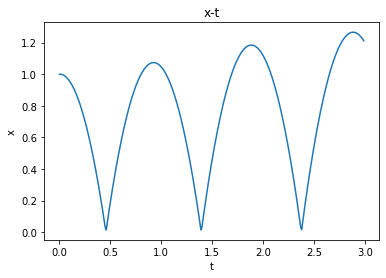

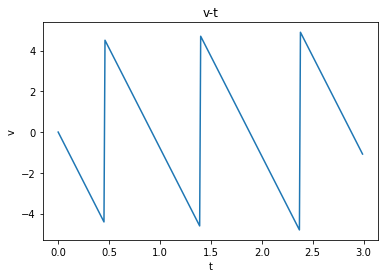

In [10]:
x = 1.0 # initial height of the ball 
v = 0 # initial velocity of the ball 
g = 9.8 # gravitational acceleration 
t = 0 # initial time 
dt = 0.01 # size of time step 
# loop for 300 timesteps 
T=np.zeros(300)
X=np.zeros(300)
V=np.zeros(300)
for i in range(300): 
    T[i]=t
    X[i]=x
    V[i]=v
    t = t + dt            
    x = x + v*dt 
    v = v - g*dt
    # reflect the motion of the ball     
    # when it hits the surface x=0     
    if x < 0:         
        x = -x         
        v = -v 
        
plt.title('x-t')
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.title('v-t')
plt.plot(T,V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

The ball jumps higher and higher, so the numerical results are physically wrong.

Systematic error: when t=0.01, x is still equai to 1.0.

Solution: change x = x + v*dt and v = v - g*dt in order.

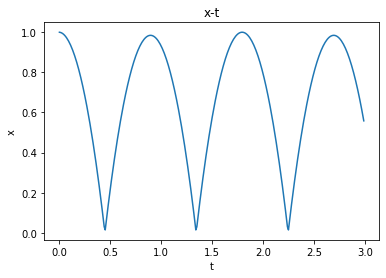

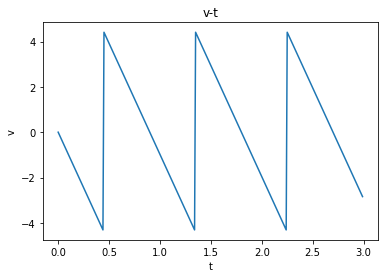

In [11]:
x = 1.0 # initial height of the ball 
v = 0 # initial velocity of the ball 
g = 9.8 # gravitational acceleration 
t = 0 # initial time 
dt = 0.01 # size of time step 
# loop for 300 timesteps 
T=np.zeros(300)
X=np.zeros(300)
V=np.zeros(300)
for i in range(300): 
    T[i]=t
    X[i]=x
    V[i]=v
    t = t + dt
    
    v = v - g*dt
    x = x + v*dt 
    
    # reflect the motion of the ball     
    # when it hits the surface x=0     
    if x < 0:         
        x = -x         
        v = -v

plt.title('x-t')
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.title('v-t')
plt.plot(T,V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

#### (2) Change the time step $dt$ in the code, but keep the same total evolution time. Explain the changes in the results.

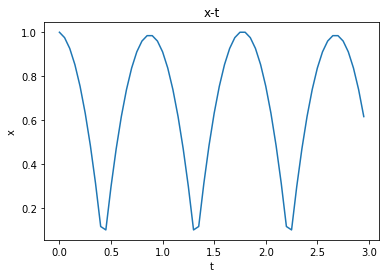

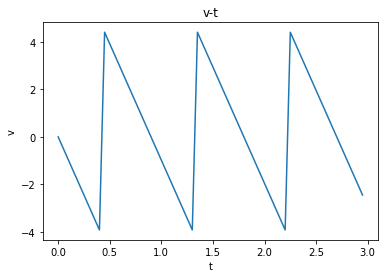

In [12]:
x = 1.0 # initial height of the ball 
v = 0 # initial velocity of the ball 
g = 9.8 # gravitational acceleration 
t = 0 # initial time 
dt = 0.05 # size of time step 
# loop for 60 timesteps 
T=np.zeros(60)
X=np.zeros(60)
V=np.zeros(60)
for i in range(60): 
    T[i]=t
    X[i]=x
    V[i]=v
    t = t + dt
    
    v = v - g*dt
    x = x + v*dt 
    
    # reflect the motion of the ball     
    # when it hits the surface x=0     
    if x < 0:         
        x = -x         
        v = -v  

plt.title('x-t')
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.title('v-t')
plt.plot(T,V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

The results show that if we change $dt$ =0.01 to $dt$ =0.05, the motion curve of the ball won't change significiant. However, in the time period of the ball bouncing on the ground, it is more accurate if we choose the smaller $dt$.

#### (3) Change the initial velocity and position of the falling ball in the code. Plot and interpret your results.

Position=5 and initial velocity=3.

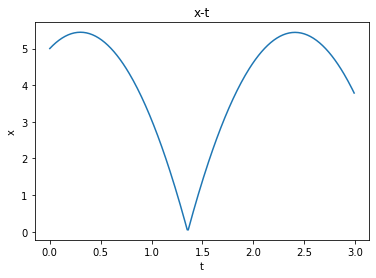

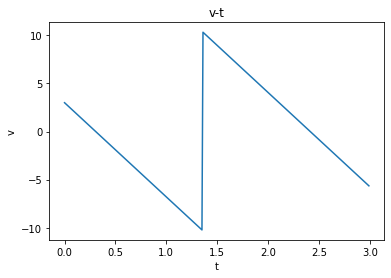

In [13]:
x = 5.0 # initial height of the ball 
v = 3.0 # initial velocity of the ball 
g = 9.8 # gravitational acceleration 
t = 0 # initial time 
dt = 0.01 # size of time step 
# loop for 300 timesteps 
T=np.zeros(300)
X=np.zeros(300)
V=np.zeros(300)
for i in range(300): 
    T[i]=t
    X[i]=x
    V[i]=v
    t = t + dt
    
    v = v - g*dt
    x = x + v*dt 
    
    # reflect the motion of the ball     
    # when it hits the surface x=0     
    if x < 0:         
        x = -x         
        v = -v  
        
plt.title('x-t')
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.title('v-t')
plt.plot(T,V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

The result agrees with the changed initial velocity and position.

#### (4) Consider inelastic collisions with the table (e.g. the ball loses 10% of its speed after every collision). Plot and interpret your results.

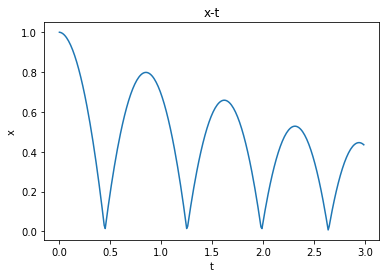

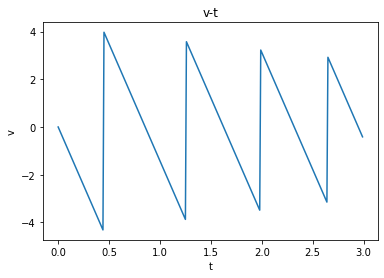

In [14]:
x = 1.0 # initial height of the ball 
v = 0 # initial velocity of the ball 
g = 9.8 # gravitational acceleration 
t = 0 # initial time 
dt = 0.01 # size of time step 
# loop for 300 timesteps 
T=np.zeros(300)
X=np.zeros(300)
V=np.zeros(300)
for i in range(300): 
    T[i]=t
    X[i]=x
    V[i]=v
    t = t + dt
    
    v = v - g*dt
    x = x + v*dt 
    
    # reflect the motion of the ball     
    # when it hits the surface x=0     
    if x < 0:         
        x = -x         
        v = -0.9*v  

plt.title('x-t')
plt.plot(T,X)
plt.xlabel('t')
plt.ylabel('x')
plt.show()

plt.title('v-t')
plt.plot(T,V)
plt.xlabel('t')
plt.ylabel('v')
plt.show()

The result shows that the height indeed becomes smaller and smaller because of inelastic collisions.

### 5.RK2方法求导
Consider the differential equation
    $$
    y^\prime (x) = 1+2xy(x), y(0) = 0
    $$
   The exact solution to this differential equation is given by
    $$
    y(x) =\frac{1}{2}\sqrt{\pi}e^{x^2}\text{erf}(x)
    $$
   where $\text{erf}(x)$ is the error function.   
    (1) Find the numerical solution for $0 \leq x \leq 1$, using Rk2 algorithm.    

rk2算法的思路是：
$$y(t+\Delta t)=y(t)+\Delta t\left[ Af(t,y(t))+Bf(t+P\Delta t,y+Q\Delta tf(t,y(t))) \right]$$

In [10]:
from numpy import arange, zeros, array
def derivative(x, y):
    return 1 + 2*x*y

def rk2(f,initial_y,a,b,dx):
    A, B = 1./2, 1./2    #现点权重A，下点权重B
    P, Q = 1., 1.   #下点的步长变化，P对应t坐标的，Q对应y坐标的
    x = arange(a,b+dx,dx)
    y = zeros(len(x))
    y[0] = initial_y
    for i in range(len(x)-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i]+dx*P, y[i]+k1*dx*Q)
        y[i+1] = y[i] + dx*(A*k1+B*k2)
    return y

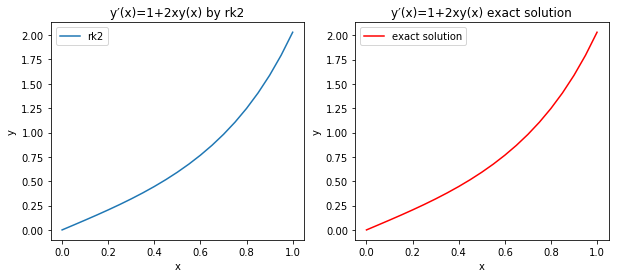

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
from numpy import pi, exp, sqrt, erf
x = arange(0., 1.+0.05, 0.05)
y = rk2(f=derivative, initial_y=0, a=0., b=1., dx=0.05) #rk2算法得到的值
y_ture = sqrt(pi)/2*exp(x**2)*erf(x) #精确值

fig, ax = plt.subplots(1,2,figsize=(10,4)) #横着做两幅图
ax[0].plot(x,y,label='rk2')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('y′(x)=1+2xy(x) by rk2')
ax[0].legend()

ax[1].plot(x,y_ture,'r',label='exact solution')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_title('y′(x)=1+2xy(x) exact solution')
ax[1].legend()
plt.show()

(2) Calculate the numeric error in your solution for various values of $\Delta x$, and plot how the error scales with $\Delta x$.    
        (i) How does this compare to the Euler method?    
        (ii) How does this compare to the <font color=green>leap-frog</font> method?   
Hint： the leap frog method is given as
    $$
    y_{n+1}=y_{n-1}+2\Delta xf(x_n,y_n)
    $$
   We require two initial conditions, $y_0$ and $y_1$. The latter can be estimated from the forward Euler scheme.

In [12]:
def forward_euler(f,initial_y,a,b,dx):
    x = arange(a,b+dx,dx)
    N = len(x)
    y = zeros(N)
    y[0] = initial_y
    for i in range(0,N-1):
        y[i+1] = y[i] + dx*f(x[i],y[i])  #前向Euler算法，步长为h
    return y

def leap_frog(f,initial_y,a,b,dx):
    x = arange(a,b+dx,dx)
    N = len(x)
    y = zeros(N)
    y[0] = initial_y
    y[1] = y[0] + dx*f(x[0],y[0])
    for i in range(1,N-1):
        y[i+1] = y[i-1] + 2*dx*f(x[i],y[i]) #leap frog算法，相当于中值eluer法，步长为2h
    return y

                  error at x=1
delta x    rk2        forward euler   leap frog 
0.500000   0.030078     0.780078      0.530078
0.333333   0.019037     0.626786      0.305799
0.250000   0.012335     0.523243      0.194141
0.200000   0.008488     0.448864      0.132571
0.125000   0.003626     0.314460      0.056046
0.062500   0.000957     0.174733      0.014616
0.031250   0.000244     0.092496      0.003695


Text(0.5,1,'error at x=1 with various $\\Delta x$')

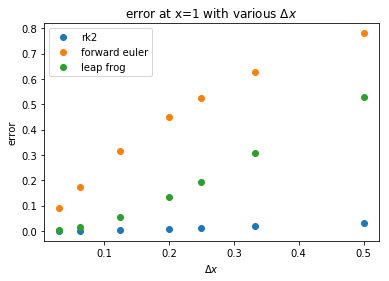

In [13]:
b = 1.
y_b_exact = sqrt(pi)/2*exp(b**2)*erf(b)
h = array([1/2,1/3,1/4,1/5,1/8,1/16,1/32])  #不同的步长
n = len(h)
err_b_rk2 = zeros(n) 
for i in range(n):
    #rk2算法x=1处误差值
    err_b_rk2[i] = y_b_exact - rk2(f=derivative, initial_y=0, a=0., b=1., dx=h[i])[-1]  

err_b_fe = zeros(n) 
for i in range(n):
    #前向Euler算法x=1处误差值
    err_b_fe[i] = y_b_exact - forward_euler(f=derivative, initial_y=0, a=0., b=1., dx=h[i])[-1] 
    
err_b_lf = zeros(n) 
for i in range(len(h)):
    #leap frog算法x=1处误差值
    err_b_lf[i] = y_b_exact - leap_frog(f=derivative, initial_y=0, a=0., b=1., dx=h[i])[-1]
    
print('{:>30s}'.format('error at x=1'))
print('{:10s} {:10s} {:15s} {:10s}'.format('delta x', 'rk2', 'forward euler', 'leap frog'))
for i in range(len(h)):
    print('{:<5f} {:10.6f} {:12.6f} {:13.6f}'.format(h[i],err_b_rk2[i],err_b_fe[i],err_b_lf[i]))
plt.plot(h,err_b_rk2,'o',label='rk2')
plt.plot(h,err_b_fe,'o',label='forward euler')
plt.plot(h,err_b_lf,'o',label='leap frog')
plt.legend()
plt.xlabel(r'$\Delta x$')
plt.ylabel('error')
plt.title(r'error at x=1 with various $\Delta x$')

**结论**：由图像和数据我们可以分析得到：步长$\Delta x$越小，误差越小；rk2算法误差 < leap frog算法误差 < forward Euler算法误差

(3) Now solve the differential equation using RK4. Analyse your results. How does the error scaling compare to RK2 method?   

In [14]:
def rk4(f,initial_y,a,b,dx):  #rk4算法
    x = arange(a,b+dx,dx)
    N = len(x)
    y = zeros(N)
    y[0] = initial_y
    for i in range(N-1):
        k1 = f(x[i], y[i])
        k2 = f(x[i]+0.5*dx, y[i]+0.5*k1*dx)
        k3 = f(x[i]+0.5*dx, y[i]+0.5*k2*dx)
        k4 = f(x[i]+dx, y[i]+k3*dx)
        y[i+1] = y[i] + dx / 6 * (k1 + 2*k2 + 2*k3 + k4)
    return y

            error at x=1
delta x    rk2        rk4       
0.500000   0.030078   0.004706
0.333333   0.019037   0.001134
0.250000   0.012335   0.000390
0.200000   0.008488   0.000167
0.125000   0.003626   0.000027
0.062500   0.000957   0.000002
0.031250   0.000244   0.000000


Text(0.5,1,'error at x=1 with various $\\Delta x$')

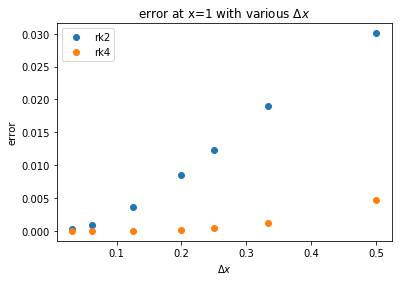

In [15]:
err_b_rk4 = zeros(n) 
for i in range(n):
    #rk4算法x=1处误差值
    err_b_rk4[i] = y_b_exact - rk4(f=derivative, initial_y=0, a=0., b=1., dx=h[i])[-1]

print('{:>24s}'.format('error at x=1'))
print('{:10s} {:10s} {:10s}'.format('delta x', 'rk2', 'rk4'))
for i in range(len(h)):
    print('{:<5f} {:10.6f} {:10.6f}'.format(h[i],err_b_rk2[i],err_b_rk4[i]))

plt.plot(h,err_b_rk2,'o',label='rk2')
plt.plot(h,err_b_rk4,'o',label='rk4')
plt.legend()
plt.xlabel(r'$\Delta x$')
plt.ylabel('error')
plt.title(r'error at x=1 with various $\Delta x$')

**结论**： rk4算法的误差 < rk2算法误差

6.  Use `scipy.integrate.odeint` to solve the following set of nonlinear ODEs.
\begin{aligned}
\frac{dx}{dt}= a(y - x),\;\frac{dy}{dt}= (c - a)x - xz + cy, \; \frac{dz}{dt}= xy - bz
\end{aligned}
For the initial conditions, use $x_0 = -10$, $y_0 = 0$, $z_0 = 35$. Setting the initial parameters to $a = 40$, $b = 5$, $c = 35$ gives chaotic solutions like those shown below. Setting $b = 10$ while keeping $a = 40$ and $c = 35$ yields periodic solutions. Take care to choose a small enough     time step (but not too small!).
![pic](david_chaos.png)



In [76]:
# cdy
from scipy.integrate import odeint

def chaos(para, title=None):
    a, b, c = para
    def ODE(diff, t):
        x, y, z = diff
        return [a*(y - x), (c - a)*x - x*z + c*y, x*y - b*z]

    t = np.linspace(0, 10, 5000)
    result = odeint(ODE, [-10, 0, 35], t)

    grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.3)
    plt.figure(figsize=(15, 15))
    
    plt.suptitle(title)

    plt.subplot(grid[0, 0:2])
    plt.plot(t, result[:, 0])
    plt.xlabel("t")
    plt.ylabel("x")

    plt.subplot(grid[0, 2])
    plt.scatter(result[:, 0], result[:, 1], s=0.5, marker='o')
    plt.xlabel("x")
    plt.ylabel("y")

    plt.subplot(grid[1, 0:2])
    plt.plot(t, result[:, 1])
    plt.xlabel("t")
    plt.ylabel("y")

    plt.subplot(grid[1, 2])
    plt.scatter(result[:, 1], result[:, 2], s=0.5, marker='o')
    plt.xlabel("y")
    plt.ylabel("z")

    plt.subplot(grid[2, 0:2])
    plt.plot(t, result[:, 2])
    plt.xlabel("t")
    plt.ylabel("z")

    plt.subplot(grid[2, 2])
    plt.scatter(result[:, 2], result[:, 0], s=0.5, marker='o')
    plt.xlabel("z")
    plt.ylabel("x")

    plt.show()
    plt.close()

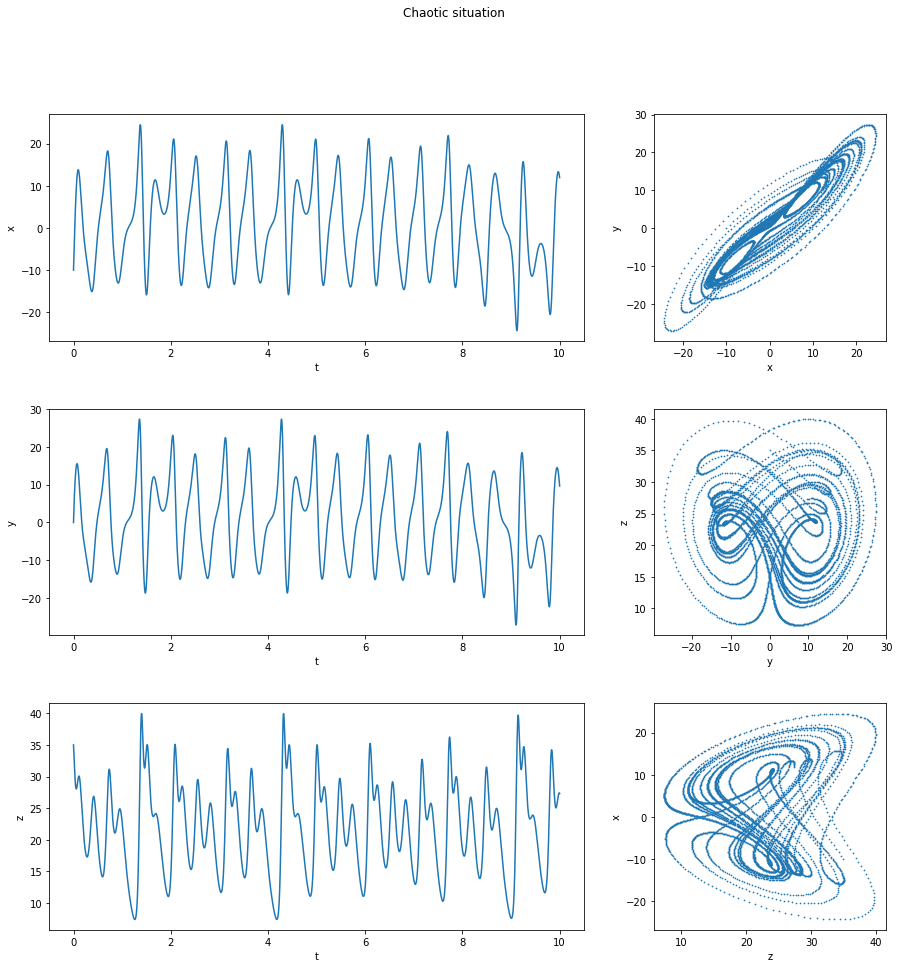

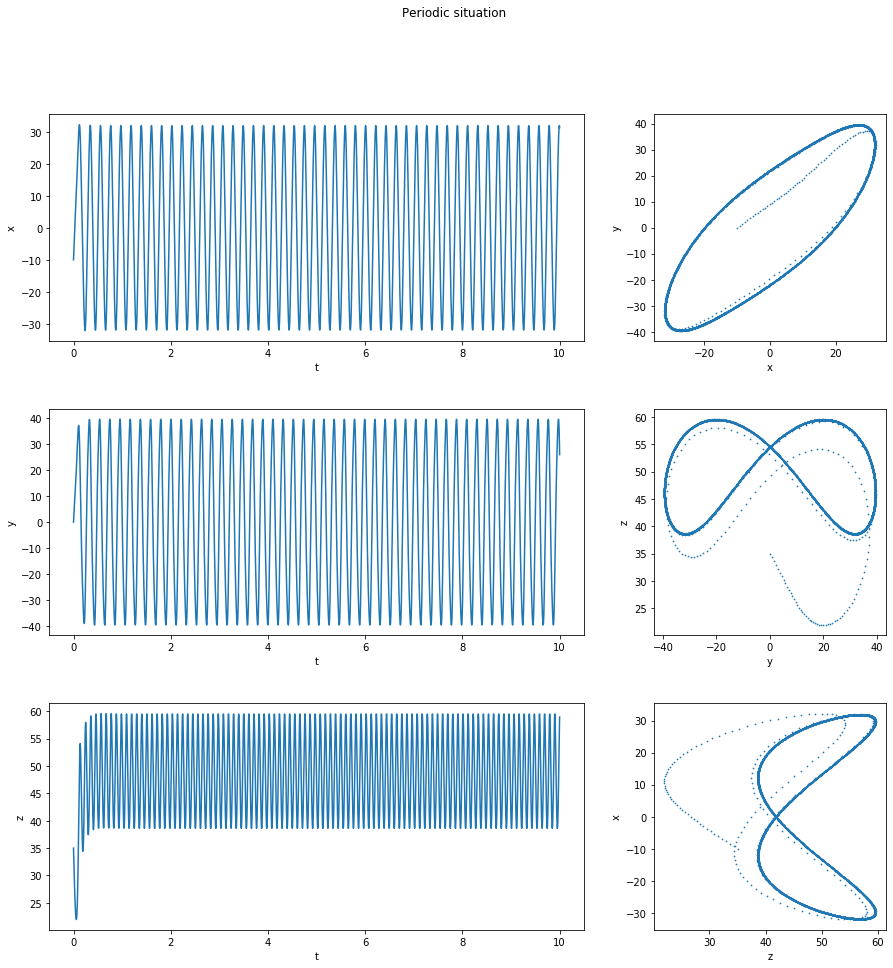

In [78]:
chaos([40, 5, 30], "Chaotic situation")         # It seems that [40, 5, 35] is not a chaos condition
chaos([40, 10, 35], "Periodic situation")